<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula4a_classificador_linear_binario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target
X.shape, y.shape

((569, 30), (569,))

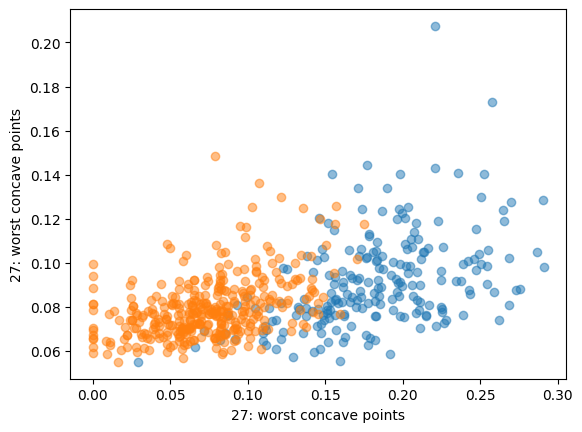

In [2]:
import matplotlib.pyplot as plt
i, j = 27, 29
Xtmp = X[:,[i,j]]
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{i}: {dataset.feature_names[i]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [3]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

def addBias(X):
  bias  = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class clf_linear(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    X_b = addBias(X)
    self.w = np.random.uniform(size=(X_b.shape[1],1))
    for _ in range(5000):
      ypred = X_b.dot(self.w)
      erros = ypred - y.reshape(-1,1)
      ajuste = X_b.T @ erros
      lr = 1 / len(y)
      self.w = self.w - lr * ajuste

  def predict(self, X):
    X_b = addBias(X)
    ypred = X_b.dot(self.w)
    ypred = (ypred>0).astype(int)
    return ypred

modelo = clf_linear()
modelo.fit(Xtmp, y)
ypred = modelo.predict(Xtmp)
sum(ypred==y.reshape(-1,1))[0]/len(y)

0.70298769771529

In [4]:
modelo.w

array([[ 1.16491045],
       [-6.10581794],
       [ 1.93323523]])

In [5]:
def plot_hyperplane(X, coef, intercept):
  def line(x0):
    return (-(x0 * coef[0]) - intercept) / coef[1]
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-")

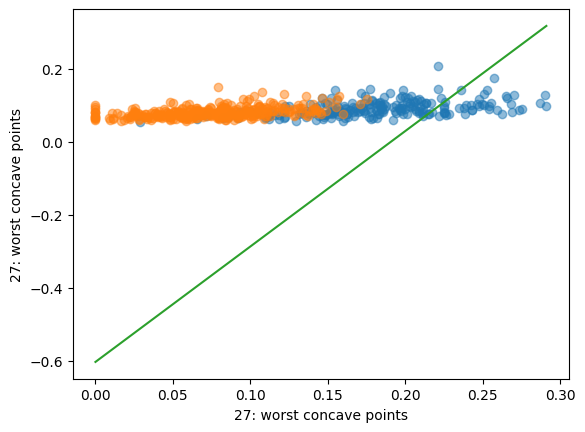

In [6]:
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{i}: {dataset.feature_names[i]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plot_hyperplane(Xtmp, modelo.w[1:], modelo.w[0])
plt.show()